# Churn Prediction of Imbalanced Bank Data set using Deep Learning and SMOTE 

## Importing Libraries and Data 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/ACHAL SHAH/Desktop/bankcustomerchurn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Feature Selection

In [3]:
df.drop(['RowNumber','CustomerId','Surname','Geography'],axis='columns',inplace=True)

## Data Exploration 

In [4]:
df.dtypes

CreditScore          int64
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df['Exited'].sum()

2037

In [7]:
df.shape

(10000, 10)

In [8]:
df[df.Exited==0]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0
6,822,Male,50,7,0.00,2,1,1,10062.80,0
8,501,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...
9993,644,Male,28,7,155060.41,1,1,0,29179.52,0
9994,800,Female,29,2,0.00,2,0,0,167773.55,0
9995,771,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0


## Note the difference for people that Exited bank is 2037 vs 7963

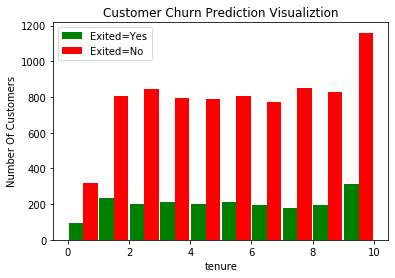

In [9]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()

## Convert unique columns to 1 or 0

In [10]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [11]:
print_unique_col_values(df)

Gender: ['Female' 'Male']


In [12]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [13]:
df.Gender.unique()

array([1, 0], dtype=int64)

In [14]:
df.dtypes

CreditScore          int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## Normalization 

In [15]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [16]:
for col in df:
    print(f'{col}: {df[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

## Split train set(80% Data) and test set(20% Data)

In [17]:
X = df.drop('Exited',axis='columns')
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)

In [18]:
X_train.shape

(8000, 9)

In [19]:
X_test.shape

(2000, 9)

In [20]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7378,0.498,0,0.216216,0.8,0.000000,0.333333,1,1,0.871009
2489,0.728,0,0.135135,0.6,0.489140,0.000000,1,1,0.335260
3843,0.866,0,0.270270,0.1,0.000000,0.666667,1,1,0.400873
4560,0.548,1,0.243243,0.0,0.000000,0.333333,1,0,0.558025
1309,0.482,0,0.162162,0.8,0.497643,0.333333,0,0,0.252395
9752,0.680,0,0.040541,0.8,0.000000,0.333333,1,1,0.778931
1963,0.456,0,0.216216,0.8,0.587837,0.333333,1,0,0.333378
815,0.790,0,0.094595,0.5,0.629710,0.333333,1,0,0.730219
2644,0.772,0,0.121622,0.5,0.205353,0.000000,0,1,0.960693
729,0.298,1,0.527027,0.1,0.000000,0.000000,0,0,0.656867


In [21]:
len(X_train.columns)

9

## Implement Deep Learning Model 

In [22]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

## Sigmoid Activation in the output layer and binary crossentropy loss is used because output is in the form of 1 or 0 

In [23]:
model = keras.Sequential([
    keras.layers.Dense(7, input_shape=(9,), activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
8000/8000 [==============================] - 0s 49us/sample - loss: 0.5096 - acc: 0.7962
Epoch 2/100
8000/8000 [==============================] - 0s 39us/sample - loss: 0.4910 - acc: 0.7962
Epoch 3/100
8000/8000 [==============================] - 0s 31us/sample - loss: 0.4758 - acc: 0.7962
Epoch 4/100
8000/8000 [==============================] - 0s 31us/sample - loss: 0.4635 - acc: 0.7962
Epoch 5/100
8000/8000 [==============================] - 0s 32us/sample - loss: 0.4546 - acc: 0.7962
Epoch 6/100
8000/8000 [==============================] - 0s 32us/sample - loss: 0.4481 - acc: 0.7962
Epoch 7/100
8000/8000 [==============================] - 0s 34us/sample - loss: 0.4426 - acc: 0.7962
Epoch 8/100
8000/8000 [==============================] - 0s 30us/sample - loss: 0

## Evaluate on test set

In [24]:
model.evaluate(X_test, y_test)

2000/2000 [==============================] - 0s 37us/sample - loss: 0.3416 - acc: 0.8600


[0.3415518038272858, 0.86]

In [25]:
yp = model.predict(X_test)
yp[:5]

array([[0.15691918],
       [0.0885756 ],
       [0.28062415],
       [0.04174185],
       [0.02688918]], dtype=float32)

## Covert 2 dimensional array into one dimension

In [26]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [27]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 1]

In [28]:
y_test[:10]

2239    1
1502    0
2221    1
6593    0
9666    0
4843    0
2266    1
3580    0
9763    0
3130    1
Name: Exited, dtype: int64

## Classification Report

In [29]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.80      0.42      0.55       407

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



## Note that recall and f1-score for output 1 is not very efficient. This is because there were only 2037 'Exited=1' samples vs 7963 'Exited=0' samples

## SMOTE - Synthetic Minority Oversampling Technique

## It generates synthetic over samples of minority class using K nearest neighbour algorithm

In [30]:
X = df.drop('Exited',axis='columns')
y = df['Exited']

### As of now for imblearn to work, do the following in command prompt: -
pip install scikit-learn==0.23.1

pip install imbalanced-learn==0.7.0

Restart the kernel

In [31]:
from imblearn.over_sampling import SMOTE

## Generate synthetic minority class samples

In [32]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

## Split train set(80% Data) and test set(20% Data)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=5, stratify=y_sm)

In [34]:
# Number of classes in training Data
y_train.value_counts()

1    6370
0    6370
Name: Exited, dtype: int64

## Implement Deep Learning Model

## Added Dropout Regularization layers to avoid overfitting. It randomly misses nodes. 20% here in this case.

In [35]:
model = keras.Sequential([
    keras.layers.Dense(7, input_shape=(9,), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
12740/12740 [==============================] - 1s 56us/sample - loss: 0.6799 - acc: 0.5767
Epoch 2/100
12740/12740 [==============================] - 0s 36us/sample - loss: 0.6598 - acc: 0.6214
Epoch 3/100
12740/12740 [==============================] - 0s 37us/sample - loss: 0.6423 - acc: 0.6338
Epoch 4/100
12740/12740 [==============================] - 0s 35us/sample - loss: 0.6216 - acc: 0.6637
Epoch 5/100
12740/12740 [==============================] - 0s 35us/sample - loss: 0.6022 - acc: 0.6903
Epoch 6/100
12740/12740 [==============================] - 0s 36us/sample - loss: 0.5873 - acc: 0.7007
Epoch 7/100
12740/12740 [==============================] - 0s 37us/sample - loss: 0.5772 - acc: 0.7053
Epoch 8/100
12740/12740 [==============================] - 0s 36us/sample - loss: 0.5725 - acc: 0.7068
Epoch 9/100
12740/12740 [==============================] - 0s 35us/sample - loss: 0.5625 - acc: 0.7104
Epoch 10/100
12740/12740 [==============================] - 0s 36us/sampl

In [36]:
model.evaluate(X_test, y_test)

3186/3186 [==============================] - 0s 83us/sample - loss: 0.4897 - acc: 0.7677


[0.4897465152667142, 0.7677338]

In [37]:
yp = model.predict(X_test)
yp[:5]

array([[0.25089496],
       [0.9410362 ],
       [0.5757518 ],
       [0.8829934 ],
       [0.32264483]], dtype=float32)

## Covert 2 dimensional array into one dimension

In [38]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [39]:
y_pred[:10]

[0, 1, 1, 1, 0, 1, 1, 0, 1, 0]

In [40]:
y_test[:10]

1095     1
8363     1
13789    1
1676     1
10533    1
898      1
11747    1
4141     0
12854    1
6453     0
Name: Exited, dtype: int64

## Classification Report

In [41]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.81      0.78      1593
           1       0.80      0.72      0.76      1593

    accuracy                           0.77      3186
   macro avg       0.77      0.77      0.77      3186
weighted avg       0.77      0.77      0.77      3186



## Improved Overall Efficiency of Model 

## Thank you!